<a href="https://colab.research.google.com/github/Aiswariy/skin-disease-api/blob/main/Another_copy_of_Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

DATASET_PATH = "/content/drive/My Drive/Skin_Disease_Dataset"

if os.path.exists(DATASET_PATH):
    print(f"✅ Dataset found at: {DATASET_PATH}")
    print("Contents of the dataset folder:")
    print(os.listdir(DATASET_PATH))
else:
    print("❌ Error: Dataset path does not exist. Check your Google Drive link.")


# Load dataset using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),  # Keep original settings
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

✅ Dataset found at: /content/drive/My Drive/Skin_Disease_Dataset
Contents of the dataset folder:
['skin-disease-datasaet']
Found 3246 images belonging to 1 classes.
Found 811 images belonging to 1 classes.


Checking no of images

In [ ]:
import os
train_dir  ="/content/drive/My Drive/Skin_Disease_Dataset/skin-disease-datasaet/train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  3691


In [ ]:
test_dir = "/content/drive/My Drive/Skin_Disease_Dataset/skin-disease-datasaet/test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  368


Seeing some sample images

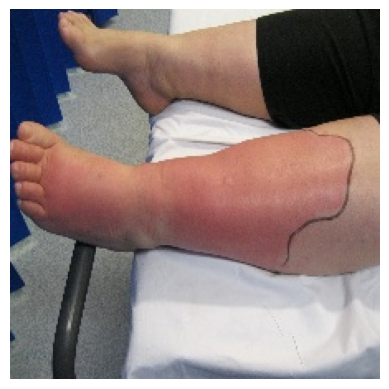

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "/content/drive/My Drive/Skin_Disease_Dataset/skin-disease-datasaet/train_set/BA- cellulitis/BA- cellulitis (1).jpeg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
print(img.shape)

(224, 224, 3)


Using Data Generators  - Helping in Data Augmentation

In [ ]:
#DEFINING THE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,         # Rotate images randomly
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Flip images
    fill_mode='nearest'        # Fill missing pixels
)


In [ ]:
#Defining the training set data generator

train_dir  ="/content/drive/My Drive/Skin_Disease_Dataset/skin-disease-datasaet/train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 3690 images belonging to 11 classes.


In [ ]:
#Defining the test set generator

test_dir = "/content/drive/My Drive/Skin_Disease_Dataset/skin-disease-datasaet/test_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 367 images belonging to 11 classes.


Building the CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.6))
model.add(Dense(11, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,312,264 (16.45 MB)

 Trainable params: 4,309,512 (16.44 MB)

 Non-trainable params: 2,752 (10.75 KB)

Model Compiling

In [ ]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

Model Training

In [ ]:
history  = model.fit(train_generator, epochs = 250, batch_size = 15, validation_data = test_generator)

Epoch 1/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 1593s 14s/step - accuracy: 0.2410 - loss: 3.7908 - val_accuracy: 0.0763 - val_loss: 2.3781
Epoch 2/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - accuracy: 0.2687 - loss: 1.8891 - val_accuracy: 0.1199 - val_loss: 2.3870
Epoch 3/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 344ms/step - accuracy: 0.2930 - loss: 1.6517 - val_accuracy: 0.1063 - val_loss: 2.3974
Epoch 4/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - accuracy: 0.3079 - loss: 1.5879 - val_accuracy: 0.1989 - val_loss: 2.1657
Epoch 5/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.3078 - loss: 1.5381 - val_accuracy: 0.2561 - val_loss: 1.9916
Epoch 6/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.3211 - loss: 1.4911 - val_accuracy: 0.2098 - val_loss: 1.9799
Epoch 7/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - accuracy: 0.3119 - loss: 1.5117 - val_accuracy: 0.1935 - val_loss: 2.7273
Epoch 8/250
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 347ms/step - accuracy: 0.3065 -

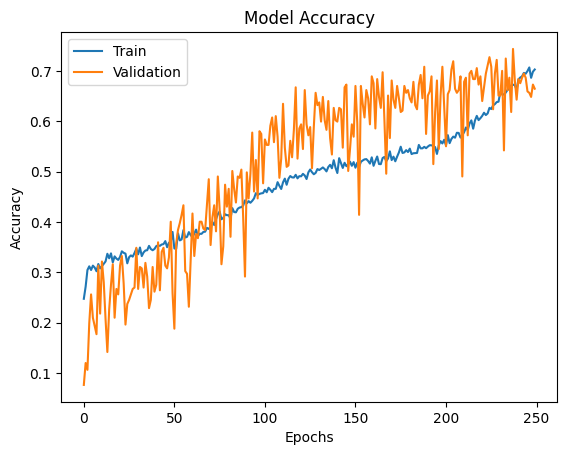

In [ ]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
model.save("skin_disease_model.h5")
model.save("/content/skin_disease_model.h5")  # For Google Colab

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import tensorflow as tf
import numpy as np
import io
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the pre-trained model
model = load_model("skin_disease_model.h5")

# Class names for prediction
class_names = ["Cellulitis", "Impetigo", "Dry Skin", "Athlete's Foot", "Nail Fungus", "Ringworm", "Normal Skin", "oily Skin",
               "Cutaneous Larva Migrans", "Chickenpox", "Shingles"]

# Confidence threshold for detecting a skin disease
CONFIDENCE_THRESHOLD = 0.5  # Adjust this value based on model performance

# Function to preprocess the image
def preprocess_image(img, target_size=(150, 150)):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    return img

# Function to predict the disease
def predict_disease(image):
    try:
        processed_img = preprocess_image(image)
        prediction = model.predict(processed_img)
        predicted_class = class_names[np.argmax(prediction)]  # Select the class with highest probability
        return predicted_class, np.max(prediction)  # Return the class and its probability
    except Exception as e:
        return str(e), None


# Function to handle file upload and prediction
def upload_image(change):
    if uploader.value:
        file_info = next(iter(uploader.value.values()))  # Get first uploaded file
        image = Image.open(io.BytesIO(file_info['content']))  # Read image as BytesIO
        result, confidence = predict_disease(image)
        print(f"Predicted Disease: {result} (Confidence: {confidence:.2f})")

# Create file upload widget
uploader = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
uploader.observe(upload_image, names='value')

# Display the file upload widget
display(uploader)




FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
Predicted Disease: Normal Skin (Confidence: 0.44)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Disease: Normal Skin (Confidence: 0.55)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Disease: oily Skin (Confidence: 0.50)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Disease: Cutaneous Larva Migrans (Confidence: 0.46)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Disease: Cellulitis (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Disease: Athlete's Foot (Confidence: 0.96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Disease: Chickenpox (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Disease: Impetigo (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Disease: Cutaneous Larva Migrans (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Disease: Ringworm (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Disease: Shingles (Confidence: 1.00)
